# TCSS503 - Week 9 Analytical Algorithms

In this interactive tutorial, we will look at the results of a few different algorithms that are used in analytics.  A pre-requisite is to install sklearn package using ```pip install scikit-learn```.

## K-Means Clustering
  
K-Means clustering is a form of classification algorithm that groups data points to their closest neighbors by selecting random points as centroids, and associating each point with the nearest centroid.  Then recalculating the centroid to be the mean of the points assigned.  After the centroid is recalculated, all points are re-labeled / assigned to the nearest centroid.  This continues until the clusters do not change from one interation to the next.  

### Setup a sample data set

The following function will generate a random 2 dimensional data set with clusters generated the provided centers with a normal distribution with the mean of the provided center, and the provided standard deviation. 

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def generate_data(centers, points_per, std_dev, seed=None):
    np.random.seed(seed)
    x = None
    y = None
    for m in centers:
        if x is None:
            x = np.random.normal(m, std_dev, size=points_per)
            y = np.random.normal(m, std_dev, size=points_per)
        else:
            x = np.hstack((x, np.random.normal(m, std_dev, size=points_per)))
            y = np.hstack((y, np.random.normal(m, std_dev, size=points_per)))

    return pd.DataFrame({'x': x, 'y': y})

df = generate_data(centers=[10, 15, 20], points_per=10, std_dev=1, seed=10)


df.head(20)

,x,y
0,11.331587,10.433026
1,10.715279,11.203037
2,8.454600,9.034934
3,9.991616,11.028274
4,10.621336,10.228630
5,9.279914,10.445138
6,10.265512,8.863398
7,10.108549,10.135137
8,10.004291,11.484537
9,9.825400,8.920195


## Look at the plot

The following function will simply plot the dataset with the provided colors.

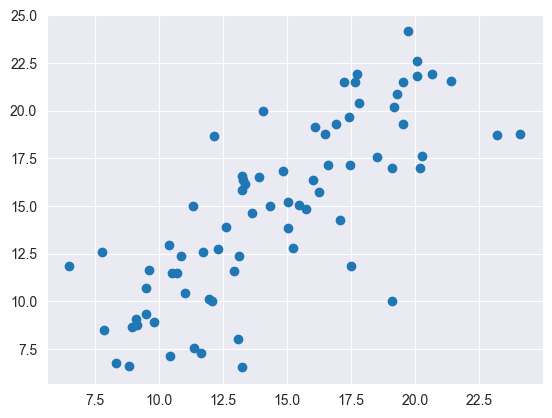

In [52]:
def draw_plot(df, colors=None):
    if colors is not None:
        plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=colors, cmap='brg')
    else:
        plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
    plt.show()

draw_plot(df)

We can tell that from this particular dataset there should be three clear clusters.  To let's take a look at how to make the computer identify those using the KMeans clustering algorithm.

## Build a "model"

You may know know it, but we're actually building a predictive model, but because this isn't a data science course, we aren't going to go into too much detail.  But we are going to touch on a few of the basics.

First we need to create the base for the model.  Because this algorithm has a random component, we are going to lock the seed so we can have repeatable results.

In [53]:
model = KMeans(n_clusters=3, random_state=100, n_init=10)

If you're interested in looking under the hood, there are a lot of different parameters we can set.  Have a quick look just to see the kinds of things we could do.

In [54]:
model.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': 100,
 'tol': 0.0001,
 'verbose': 0}

## Execute the "labeling" of the points (also known as "fitting" the model)

Now that we have the model, we just need to feed it the data that we generated.  It will store the data and the associated "labels" (colors) for the points.

In [55]:
model.fit(df)

model.labels_

array([2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Visualize the output by passing the color labels into the plot.

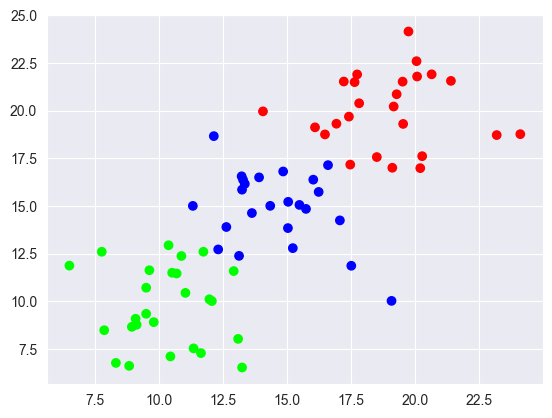

In [56]:
draw_plot(df, colors=model.labels_)

Pretty cool huh?   Let's expermient a little bit and see how the model handles more points.

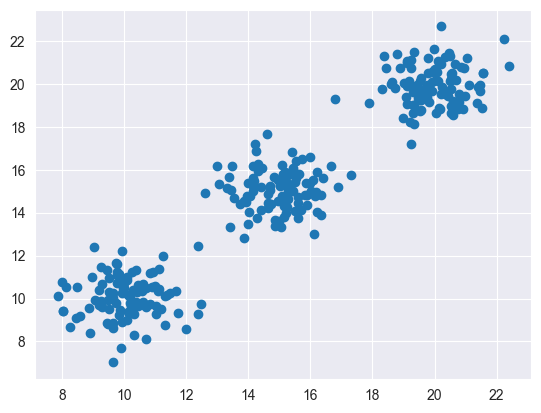

In [57]:
df = generate_data(centers=[10, 15, 20], points_per=100, std_dev=1, seed=10)
draw_plot(df)



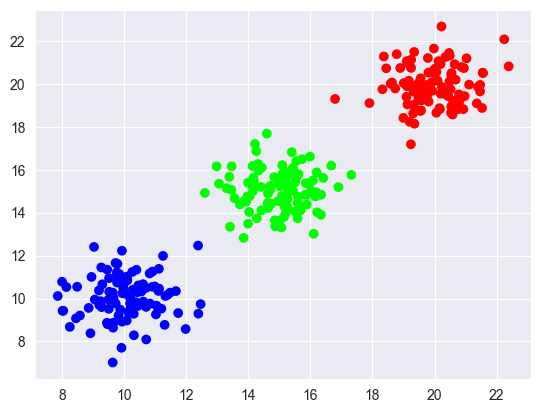

In [58]:
model.fit(df)
draw_plot(df, colors=model.labels_)



What do you think will happen if we expand the standard deviation of generated clusters?  let's see.

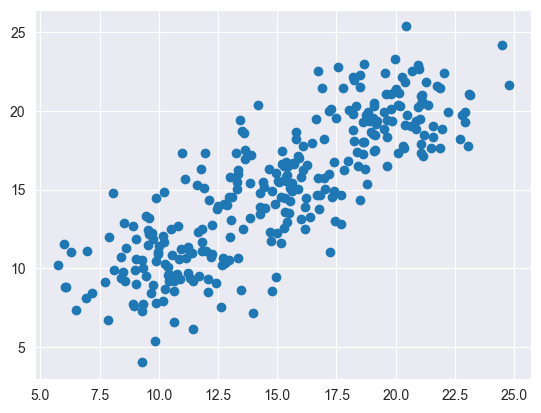

In [59]:
df = generate_data(centers=[10, 15, 20], points_per=100, std_dev=2, seed=10)
draw_plot(df)

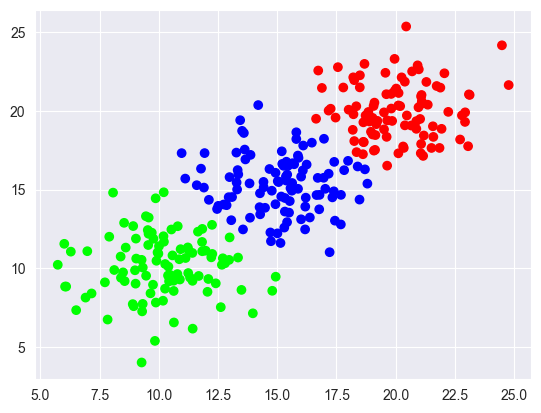

In [60]:
model.fit(df)
draw_plot(df, colors=model.labels_)

## Take a look at the randomness

There are a lot of points that are close together, and depending on where the centroids start we might have different patterns emerge.  Try this out, without setting the random state, run the following cell multiple times to see the clusters change.

/opt/homebrew/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


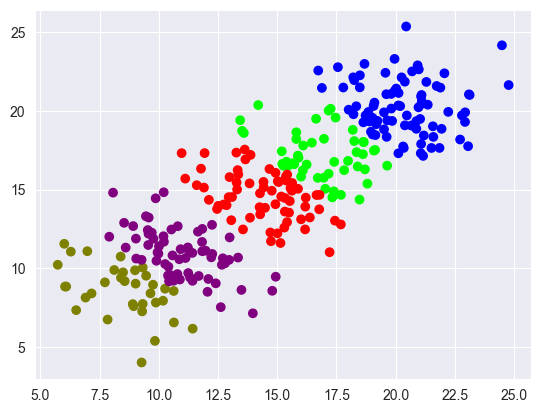

In [61]:
model = KMeans(n_clusters=5)

model.fit(df)
draw_plot(df, colors=model.labels_)

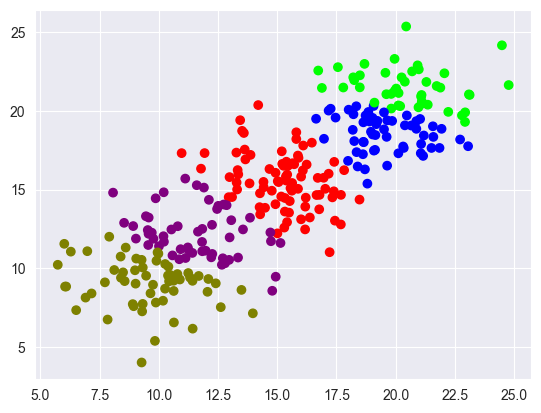

In [63]:
model = KMeans(n_clusters=5, n_init=10)

model.fit(df)
draw_plot(df, colors=model.labels_)

## If something is random is it still useful?

Absolutely.  There are some records that could sometimes be in class 1 and sometimes be in class 2.  These are outliers, hard to classify, but there are core common patterns that are useful.


# K-Nearest Neighbor

K Nearest Neighbors (KNN) is a very easy algorithm that classifies newly introduced data into your classification model.  It simply looks as the K nearest neighbors, and uses majority voting to decide how to classify that record.  Let's take a look at this in action.  

We will first define a new function for drawing our graphs but with both the training data and the newly classified dataset.


In [64]:
def draw_plot_with_predicts(train, colors, test, predictions):
    ax = plt.gca()
    ax.scatter(train.iloc[:, 0], train.iloc[:, 1], c=colors, cmap='brg')
    ax.scatter(test.iloc[:, 0], test.iloc[:,1], c=predictions, cmap='brg', marker='x')
    plt.show()

Since we've created a bunch of models, let's create a new one just to be sure we have something new we can work with easily.

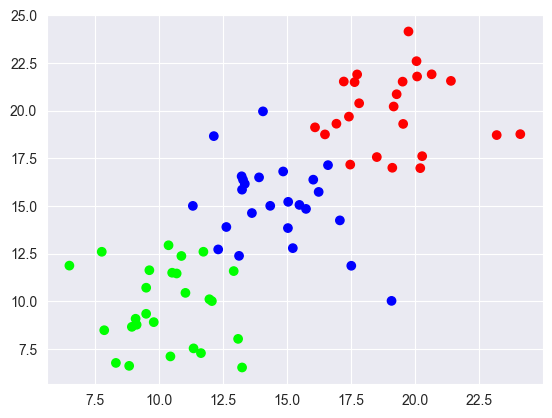

In [66]:
df = generate_data(centers=[10, 15, 20], points_per=25, std_dev=2, seed=100)
model = KMeans(n_clusters=3, n_init=10)
model.fit(df)
draw_plot(df, model.labels_)

Let's take 3 points and see if we can get them to be classified correctly.  

From the looks of this something at 10,10 should be red, 15, 15 should be green and 20, 20 should be Blue.   

We use the "predict" function in our model to apply KNN to predict classification of the 3 new points.

For fun, let's also throw something that is likely an outlier (let's say (20,5) and see what we will predict)

In [67]:
new_points = pd.DataFrame({'x':[10,15,20,20], 'y':[10,15,20,5]})

new_points

,x,y
0,10,10
1,15,15
2,20,20
3,20,5


[2 0 1 2]


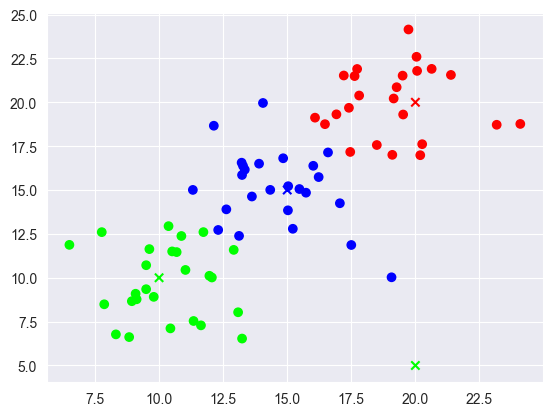

In [68]:
new_point_colors = model.predict(new_points)
print(new_point_colors)

draw_plot_with_predicts(df, model.labels_, new_points, new_point_colors)



The new points are colored and displayed as as "x".  They may be difficult to see depending on the amount of density in the plot around them.  

But what we should see is that the classifier correctly identifies the points within the areas we would expect.  And the outlier also gets classified.

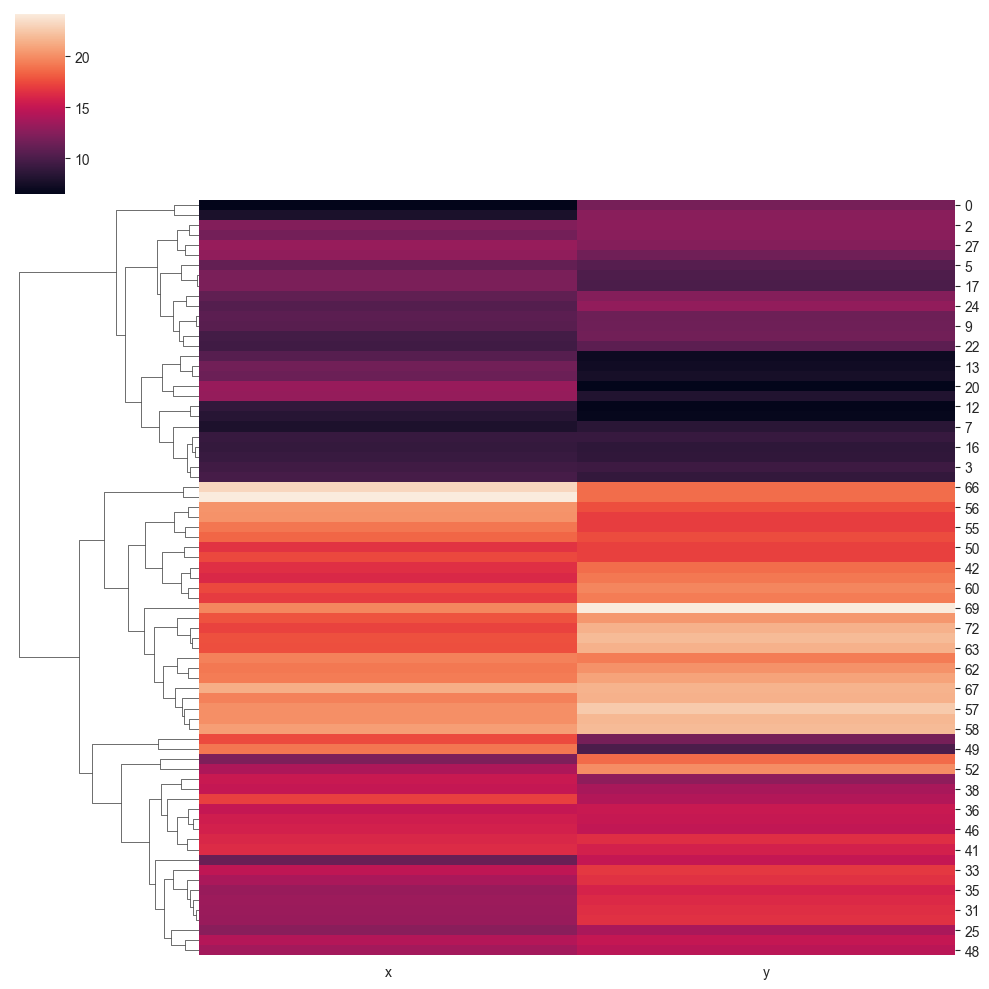

In [69]:
df = generate_data(centers=[10, 15, 20], points_per=25, std_dev=2, seed=100)

import seaborn as sns
sns.clustermap(df, col_cluster=False)
plt.show()


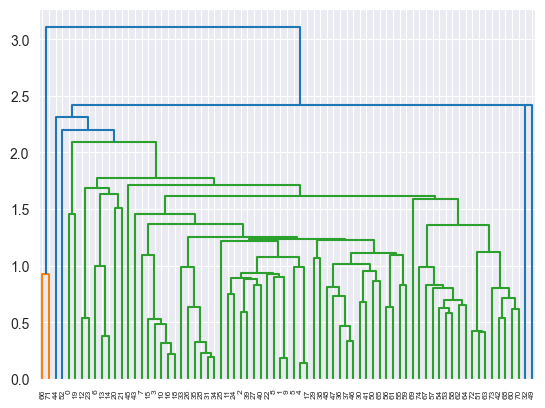

In [70]:
import scipy.cluster.hierarchy as shc
model = shc.linkage(df)
dend = shc.dendrogram(model)
plt.show()